In [4]:
import numpy as np, os, sys, matplotlib.pyplot as plt, seaborn as sns

In [34]:
def get_xy(np_array):
  return np.where(~np.isnan(np_array))[0], np_array[~np.isnan(np_array)]

In [50]:
def get_dict_of_arrays(exp_model_dict, read_directory='../log_calculations/unified_outputs/', fname_to_read='pppl.npy'):
    np_arrays = {}
    
    for exp, models in exp_model_dict.items():
        for model in models:
            file_name = os.path.join(read_directory, exp, model, fname_to_read)
            np_arrays[exp + '**' + model] = get_xy(np.load(file_name))

    return np_arrays

In [55]:
def plot_10bins(dict_of_arrays, plot_original_scibert = True):

    fig, ax = plt.subplots()
    
    for name, (x,y) in dict_of_arrays.items():
        ax.scatter(x,y,label=name.split('**')[1])
    
    if plot_original_scibert:
        original_scibert = np.load('../prog_update_lcf/plots/allenai/scibert_scivocab_cased/pppl.npy')
        ax.plot(original_scibert, color='black')
    ax.set_xlabel('Bin')
    ax.set_ylabel('PPPL')
    
    year_labels = {
        0 : '1879-1933',
        20 : '1993-1994',
        40 : '2006',
        60 : '2013',
        80 : '2018',
        99: '2023'
    }
    
    labels = [v for k, v in year_labels.items()]
    
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xticks(list(year_labels.keys()), labels)
    ax2.set_xlabel('~Year')
    
    ax.legend(loc='center left', bbox_to_anchor=(1.0,0.5))

    return fig, ax
        

{'filter_newline**bert-base-cased': (array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99]), array([7.65592945, 5.96744983, 5.72769176, 5.95727909, 6.68837428,
       6.65318936, 6.60223639, 7.32595029, 7.89521491, 7.06502624,
       6.46551754])), 'filter_newline**bert-large-cased': (array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99]), array([5.57386591, 4.47085256, 4.30619016, 4.48337688, 5.09607138,
       5.00337161, 4.96177196, 5.47002611, 5.67685212, 5.2541465 ,
       4.83162546])), 'filter_newline**roberta-base': (array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99]), array([6.85915888, 5.56620934, 5.46270376, 5.28319944, 5.53511713,
       5.35870319, 5.21640069, 5.57306354, 5.41177448, 5.16450589,
       4.71396952]))}


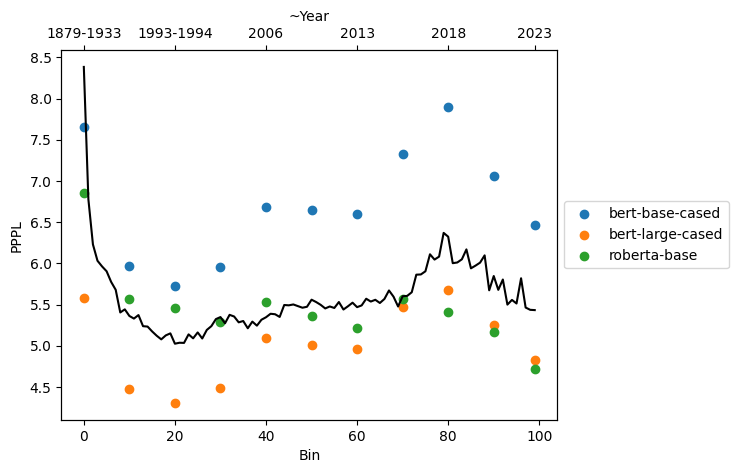

In [58]:
english_models = {
    'filter_newline' : ['bert-base-cased', 'bert-large-cased', 'roberta-base']
}
em_arrays = get_dict_of_arrays(english_models)
fig, ax = plot_10bins(em_arrays)
fig.show()

{'filter_newline**bert-base-cased': (array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99]), array([7.65592945, 5.96744983, 5.72769176, 5.95727909, 6.68837428,
       6.65318936, 6.60223639, 7.32595029, 7.89521491, 7.06502624,
       6.46551754])), 'filter_newline**bert-large-cased': (array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99]), array([5.57386591, 4.47085256, 4.30619016, 4.48337688, 5.09607138,
       5.00337161, 4.96177196, 5.47002611, 5.67685212, 5.2541465 ,
       4.83162546])), 'multilingual**bert-base-multilingual-cased': (array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99]), array([7.53345393, 5.5414391 , 5.29527573, 5.30987727, 5.43345416,
       5.43425765, 5.38871948, 5.52038594, 5.32440761, 5.38221024,
       4.7679634 ]))}


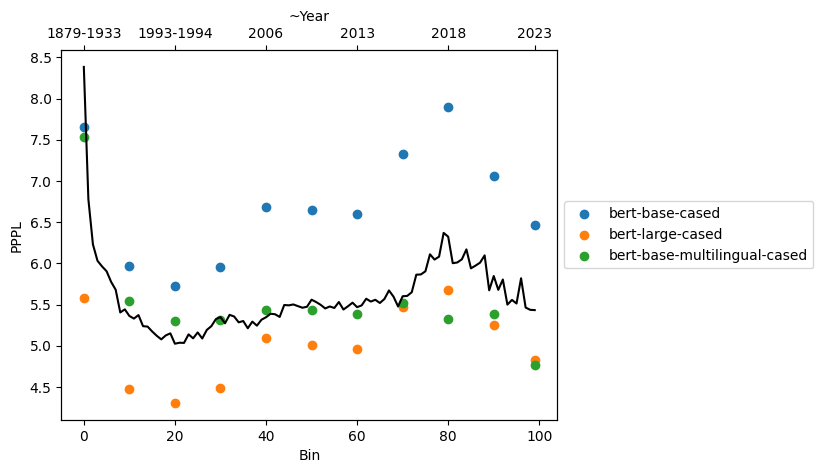

In [57]:
berts = {
    'filter_newline' : ['bert-base-cased', 'bert-large-cased'],
    'multilingual' : ['bert-base-multilingual-cased']
}

bert_arrays = get_dict_of_arrays(berts)
print(bert_arrays)

fig, ax = plot_10bins(bert_arrays)

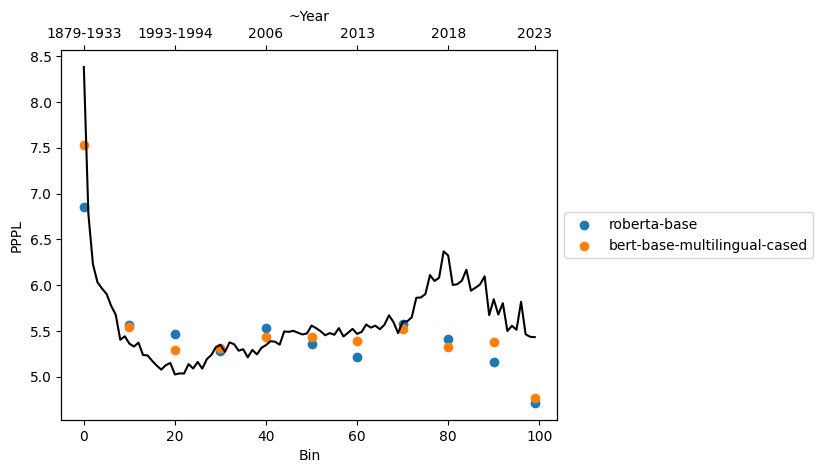

In [60]:
mbert_roberta = {
    'filter_newline' : ['roberta-base'],
    'multilingual' : ['bert-base-multilingual-cased']
}

mr_arrays = get_dict_of_arrays(mbert_roberta)
fig, ax = plot_10bins(mr_arrays)